<a href="https://colab.research.google.com/github/williamsdoug/CTG_RP/blob/master/CTG_RP_Explore_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Datasets and Verify Content

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import config_local
from config_local import *

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from fastai.vision import *

import collections
import pprint

In [0]:
from compute_metadata import get_splits, generate_label_file, generate_lists

## Generate Train and Valid Label Files

In [0]:
train_valid_groups_full = get_splits(image_dir='images', image_file='rp_images_index.json', 
                                     #include=['d2_t1_p3.', 'd2_t1_p1.'],
                                     thresh = 7.15)
              
# Use any split to create labels
generate_label_file(train_valid_groups_full[0])

# Create valid_x.csv files for each split
for i in range(len(train_valid_groups_full)):
    generate_lists(train_valid_groups_full[i], train_file='train_{}.csv'.format(i),
                   valid_file='valid_{}.csv'.format(i))

# pprint(generate_label_file(test_valid_groups_full[0], csv_file=None))
# pprint(generate_valid_list(test_valid_groups_full[0], valid_file=None))

In [6]:
!ls images/*.csv

images/train_0.csv  images/train_3.csv	images/valid_1.csv  images/valid_4.csv
images/train_1.csv  images/train_4.csv	images/valid_2.csv
images/train_2.csv  images/valid_0.csv	images/valid_3.csv


In [0]:
tfms=[]
size=60
bs=4
workers=4

path = Path() / 'images'

In [0]:
train = ImageList.from_csv(path, 'train_0.csv')
valid = ImageList.from_csv(path, 'valid_0.csv')

lls = ItemLists(path, train, valid).label_from_df(cols=1).transform(tfms, size=size) 
db = lls.databunch(bs=bs, num_workers=workers)#.normalize(imagenet_stats)

## Examine Results
### Train and Test ImageLists

In [9]:
train

ImageList (492 items)
Image (3, 599, 599),Image (3, 599, 599),Image (3, 599, 599),Image (3, 599, 599),Image (3, 599, 599)
Path: images

492 torch.Size([599, 599])


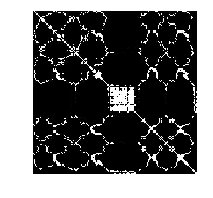

In [10]:
im = train.get(-1)
print(len(train), im.size)
im.show()

In [11]:
valid

ImageList (120 items)
Image (3, 599, 599),Image (3, 599, 599),Image (3, 599, 599),Image (3, 599, 599),Image (3, 599, 599)
Path: images

120 torch.Size([599, 599])


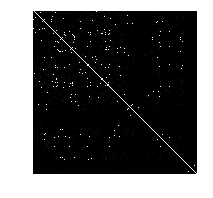

In [12]:
im = valid.get(0)
print(len(valid), im.size)
im.show()

### After applying labels

In [13]:
print('nClass: {}    classes: {}'.format(lls.c, lls.classes))  
print('\nLabel Distribution by ImageList')
for t, x in [['train', lls.train], ['valid', lls.valid]]:
    c = collections.Counter(x.y)
    print('    ', t, dict(c))
lls

nClass: 2    classes: [0, 1]

Label Distribution by ImageList
     train {Category 0: 246, Category 1: 246}
     valid {Category 0: 60, Category 1: 60}


LabelLists;

Train: LabelList (492 items)
x: ImageList
Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60)
y: CategoryList
0,0,0,0,0
Path: images;

Valid: LabelList (120 items)
x: ImageList
Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60)
y: CategoryList
0,0,0,0,0
Path: images;

Test: None

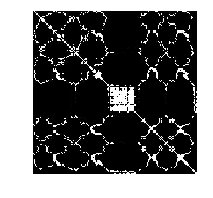

In [14]:
lls.train.get(-1).show()

### DataBunch

In [15]:
print('nClass: {}    classes: {}'.format(db.c, db.classes))
db

nClass: 2    classes: [0, 1]


ImageDataBunch;

Train: LabelList (492 items)
x: ImageList
Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60)
y: CategoryList
0,0,0,0,0
Path: images;

Valid: LabelList (120 items)
x: ImageList
Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60),Image (3, 60, 60)
y: CategoryList
0,0,0,0,0
Path: images;

Test: None